<a href="https://colab.research.google.com/github/victorxbarbosa/victorxbarbosa/blob/main/Estudo_de_caso_da_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Panorama da COVID-19

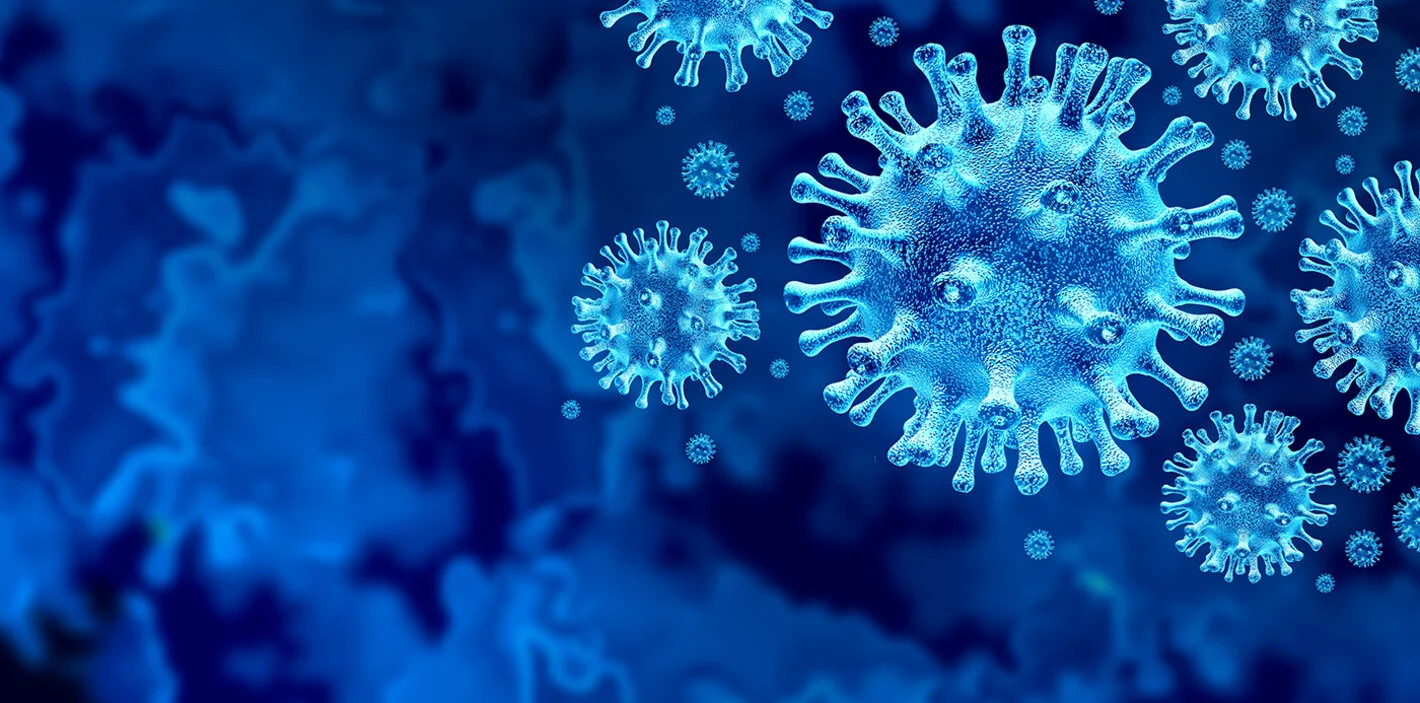

# O que é COVID - 19?

A COVID - 19 é uma doença respiratória causada pelo coronavírus (SARS-CoV-2) que apareceu pela primeira vez em 17 de dezembro de 2019 na cidade de Wuhan, China. Sua transmissão ocorre através de gotículas presente no ar lançadas por pessoas infectadas por meio da tosse ou espirro. Os sintomas geralmente são tosse seca, dificuldade para respirar e febre, mas em casos mais sérios e a ocorrencia em pessoas que já estão doentes podem levar a letalidade.

Diversas decisões foram tomadas para evitar a propagação da doença, como fechamento de locais de trabalho e a suspensão ou redução de atividades. Até o presente momento, observa-se que cerca de 80% dos casos confirmados são assintomáticos e rápidos. A maioria das pessoas que se encaixam nesse grupo, se recupera sem nenhuma sequela.

No entanto, 15% das pessoas terão infecções graves e precisarão de oxigênio. O restante das pessoas, que representam 5%, serão classificadas como infecções muito graves e precisarão de ventilação assistida, por meio de respiradores mecânicos em ambiente hospitalar.

# Objetivos do estudo

Este estudo busca entender como foi o desenvolvimendo da COVID-19 nos continentes e países mais afetados, saber quantos casos ocorreram, média de casos por dia, saber quando teve a primeira fatalidade por COVID-19, quantas fatalidades tivemos, média de fatalidades diárias, entender quando começou a vacinar as pessoas, países e continentes com mais pessoas vacinadas e entender a relação das mortes com o aumento da vacinação. 

# Coletando os dados

[Our World Data](https://ourworldindata.org/) é uma publicação digital especializada em expor pesquisas empíricas e dados analíticos sobre mudanças nas condições de qualidade de vida ao redor do mundo. [GitHub da Our World Data](https://github.com/owid/covid-19-data/tree/master/public/data).

* [*Owid-covid-data.csv*](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data.csv) - dados usados nesta análise.

In [1]:
# instalar bibliotecas
!pip install wordcloud -q

!pip install sweetviz -q

In [2]:
# importar bibliotecas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline

# costumizar alguns parâmetros
plt.rcParams.update({'axes.spines.right': False, 'axes.spines.top': False})
plt.rcParams["font.size"] = 12

In [3]:
# importar dados
dados = 'https://github.com/owid/covid-19-data/raw/master/public/data/owid-covid-data.csv'

# criar dataframe
df = pd.read_csv(dados)

# visualizar as primeiras entradas
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


#Entendendo os dados

Vamos observar e entender os atributos do nosso dataframe.

**Dicionário de atributos**
* `iso_code` - código de três letras de um país.
* `continent` - continente.
* `location` - localização geográfica.
* `date` - data da observação
* `total_cases` - total de casos confirmados da COVID-19.
* `new_cases` - novos casos confirmados de COVID-19.
* `new_cases_smoothed` - novos casos confirmados de COVID-19 (suavizado de 7 dias).
* `total_deaths` - total de mortes por COVID-19.
* `new_deaths` - novas mortes por COVID-19.
* `new_deaths_smoothed` - novas mortes por COVID-17 (suavizado de 7 dias).
* `total_cases_per_million` - total de casos confirmados de COVID-19 por 1.000.000 de pessoas.
* `new_cases_per_million` - novos casos confirmados de COVID-19 por 1.000.000 de pessoas.	
* `new_cases_smoothed_per_million` - novos casos confirmados de COVID-19 (suavizado de 7 dias) por 1.000.000 de pessoas.
* `total_deaths_per_million` - total de mortes de COVID-19 por 1.000.000 de pessoas.	
*`new_deaths_per_million` - novas mortes de COVID-19 por 1.000.000 de pessoas.	
*`new_deaths_smoothed_per_million` - novas mortes por COVID-19 (suavizado de 7 dias) por 1.000.000 de pessoas.
* `reproduction_rate`	- taxa de recuperação da COVID-19 em tempo real.
* `icu_patients` - número de pacientes com COVID-19 em unidades de terapia intensiva (UTIs) em um determinado dia.
* `icu_patients_per_million` - número de pacientes com COVID-19 em unidades de terapia intensiva (UTIs) em um determinado dia por 1.000.000 de pessoas.
* `hosp_patients` - número de pacientes com COVID-19 em hospital em um determinado dia.
* `hosp_patients_per_million` - número de pacientes com COVID-19 em hospital em um determinado dia por 1.000.000 de pessoas.
* `weekly_icu_admissions` - número de pacientes com COVID-19 recém-admitidos em unidades de terapia intensiva (UTIs) em uma determinada semana (data de notificação e 6 dias anteriores).
* `weekly_icu_admissions_per_million`	- número de pacientes com COVID-19 recém-admitidos em unidades de terapia intensiva (UTIs) em uma determinada semana (data de notificação e 6 dias anteriores) por 1.000.000 de pessoas.
* `weekly_hosp_admissions` - número de pacientes com COVID-19 recém-admitidos em hospitais em uma determinada semana (data do relatório e 6 dias anteriores).
* `weekly_hosp_admissions_per_million` - número de pacientes com COVID-19 recém-admitidos em hospitais em uma determinada semana (data do relatório e 6 dias anteriores) por 1.000.000 de pessoas.
* `total_tests` - total de teste de COVID-19.
* `new_tests` - total de novos testes por COVID-19.
* `total_tests_per_thousand` - total de testes de COVID-19 por 1.000 pessoas.
* `new_tests_per_thousand` - total de novos testes de COVID-19 por 1.000 pessoas.
* `new_tests_smoothed` - total de novos testes de COVID-19 (suavizado de 7 dias).
* `new_tests_smoothed_per_thousand` - total de novos testes de COVID-19 (suavizado de 7 dias) por 1.000 pessoas.
* `positive_rate` - parcela de testes COVID-19 positivos, dada como uma média contínua de 7 dias (este é o inverso de tests_per_case).
* `tests_per_case` - testes realizados por novo caso confirmado de COVID-19, dados como uma média contínua de 7 dias (este é o inverso de positive_rate).
* `tests_units`	- unidades usadas pelo local para relatar seus dados de teste.
* `total_vaccinations` - total de doses aplicadas da vacina da COVID-19.
* `people_vaccinated` - total de pessoas vacinadas.
* `people_fully_vaccinated` - total de pessoas que receberam todas as doses da vacina.
* `total_boosters` - total das doses de reforçoda vacina.
* `new_vaccinations` - novas doses de vacinadas aplicadas.
* `new_vaccinations_smoothed` - novas doses de vacinas aplicadas (suavizada de 7 dias).
* `total_vaccinations_per_hundred` - total de vacinas aplicadas por 100 pessoas.
* `people_vaccinated_per_hundred` - total de pessoas que receberam ao menos uma dose da vacina por 100pessoas.
* `people_fully_vaccinated_per_hundred` - total de pessoas que tomaram todas as doses da vacina por 100.	
* `total_boosters_per_hundred` - total de pessoas que tomaram a dose de reforço da vaxina por 100.
* `new_vaccinations_smoothed_per_million` - novas doses de vacinas aplicadas (suavizado de 7 dias) por 1.000.000 de pessoas.
* `new_people_vaccinated_smoothed` - número diário de pessoas que receberam a primeira dose da vacina (suavizado de 7 dias).
* `new_people_vaccinated_smoothed_per_hundred` - número diário de pessoas que recebem sua primeira dose de vacina (suavizado de 7 dias) por 100. 
* `stringency_index` - Índice de Rigidez de Resposta do Governo: medida composta com base em 9 indicadores de resposta, incluindo fechamento de escolas, fechamento de locais de trabalho e proibição de viagens, reescalonado para um valor de 0 a 100 (100 = resposta mais rigorosa).
* `population` - população.
* `population_density` - número de pessoas dividido por área de terra, medido em quilômetros quadrados.
* `median_age` - idade mediana da população.
* `aged_65_older` - população a partir dos 65 anos.
* `aged_70_older` - população a partir dos 70 anos.
* `gdp_per_capita` - produto interno bruto em paridade de poder de compra.
* `extreme_poverty` - percentual da população que vive em extrema pobreza.
* `cardiovasc_death_rate`	- taxa de mortalidade por doença cardiovascular em 2017 (número anual de mortes por 100.000 pessoas).
* `diabetes_prevalence` - prevalência de diabetes (% da população de 20 a 79 anos) em 2017.
* `female_smokers` - proporção de mulheres que fumam.
* `male_smokers` - proporção de homens que fumam.
* `handwashing_facilities` - percentagem da população com instalações básicas de lavagem das mãos nas instalações.
* `hospital_beds_per_thousand` - camas hospitalares por 1.000 pessoas.
* `life_expectancy` - expectativa de vida ao nascer em 2019.
* `human_development_index` - índice composto que mede o desempenho médio em três dimensões básicas do desenvolvimento humano – uma vida longa e saudável, conhecimento e um padrão de vida decente.
* `excess_mortality` - diferença percentual entre o número relatado de mortes semanais ou mensais em 2020-2021 e o número projetado de mortes para o mesmo período com base em anos anteriores.
* `excess_mortality_cumulative` - diferença percentual entre o número acumulado de mortes desde 1 de janeiro de 2020 e as mortes cumulativas projetadas para o mesmo período com base em anos anteriores.
* `excess_mortality_cumulative_absolute` - diferença cumulativa entre o número relatado de óbitos desde 1º de janeiro de 2020 e o número projetado de óbitos para o mesmo período com base em anos anteriores.
* `excess_mortality_cumulative_per_million` - diferença cumulativa entre o número de mortes relatado desde 1º de janeiro de 2020 e o número projetado de mortes para o mesmo período com base em anos anteriores, por 1.000.000 de pessoas.



In [4]:
# informações sobre nosso dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201270 entries, 0 to 201269
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    201270 non-null  object 
 1   continent                                   189611 non-null  object 
 2   location                                    201270 non-null  object 
 3   date                                        201270 non-null  object 
 4   total_cases                                 193204 non-null  float64
 5   new_cases                                   192963 non-null  float64
 6   new_cases_smoothed                          191786 non-null  float64
 7   total_deaths                                174533 non-null  float64
 8   new_deaths                                  174522 non-null  float64
 9   new_deaths_smoothed                         173360 non-null  float64
 

In [5]:
# ver o tamanho do dataframe
print("{} entradas.".format(df.shape[0]))
print("{} atributos.".format(df.shape[1]))

201270 entradas.
67 atributos.


In [6]:
# distribuição estatística
df.describe(include='all')

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,201270,189611,201270,201270,1.932040e+05,1.929630e+05,1.917860e+05,1.745330e+05,174522.000000,173360.000000,...,125326.000000,123609.000000,81372.000000,147238.000000,188242.000000,161351.000000,6.846000e+03,6846.000000,6846.000000,6846.000000
unique,244,6,244,926,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ARG,Africa,Argentina,2021-08-26,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,926,46623,926,243,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,3.630611e+06,1.239687e+04,1.239506e+04,6.758624e+04,151.297802,152.086953,...,10.662117,32.798604,50.892603,3.085594,73.636537,0.725068,4.308325e+04,9.327044,14.412781,1157.816469
std,NaN,NaN,NaN,NaN,2.280589e+07,8.679393e+04,8.489684e+04,3.509214e+05,771.007425,754.582938,...,10.607893,13.530435,31.850417,2.551419,7.448177,0.149715,1.197462e+05,14.127429,27.922957,1656.999495
min,NaN,NaN,NaN,NaN,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-3.772610e+04,-28.450000,-95.920000,-3422.406298
25%,NaN,NaN,NaN,NaN,3.116000e+03,0.000000e+00,6.714000e+00,1.010000e+02,0.000000,0.143000,...,1.900000,21.600000,20.859000,1.300000,69.500000,0.602000,-1.450000e+01,-0.180000,-0.460000,-7.288569
50%,NaN,NaN,NaN,NaN,3.903900e+04,6.700000e+01,1.000000e+02,9.860000e+02,1.000000,1.857000,...,6.300000,31.400000,49.839000,2.500000,75.050000,0.743000,4.815300e+03,6.785000,7.090000,605.770016
75%,NaN,NaN,NaN,NaN,4.206485e+05,1.011000e+03,1.129286e+03,8.877000e+03,16.000000,17.857000,...,19.300000,41.300000,83.241000,4.200000,79.070000,0.845000,3.062268e+04,15.080000,20.825000,1860.772631


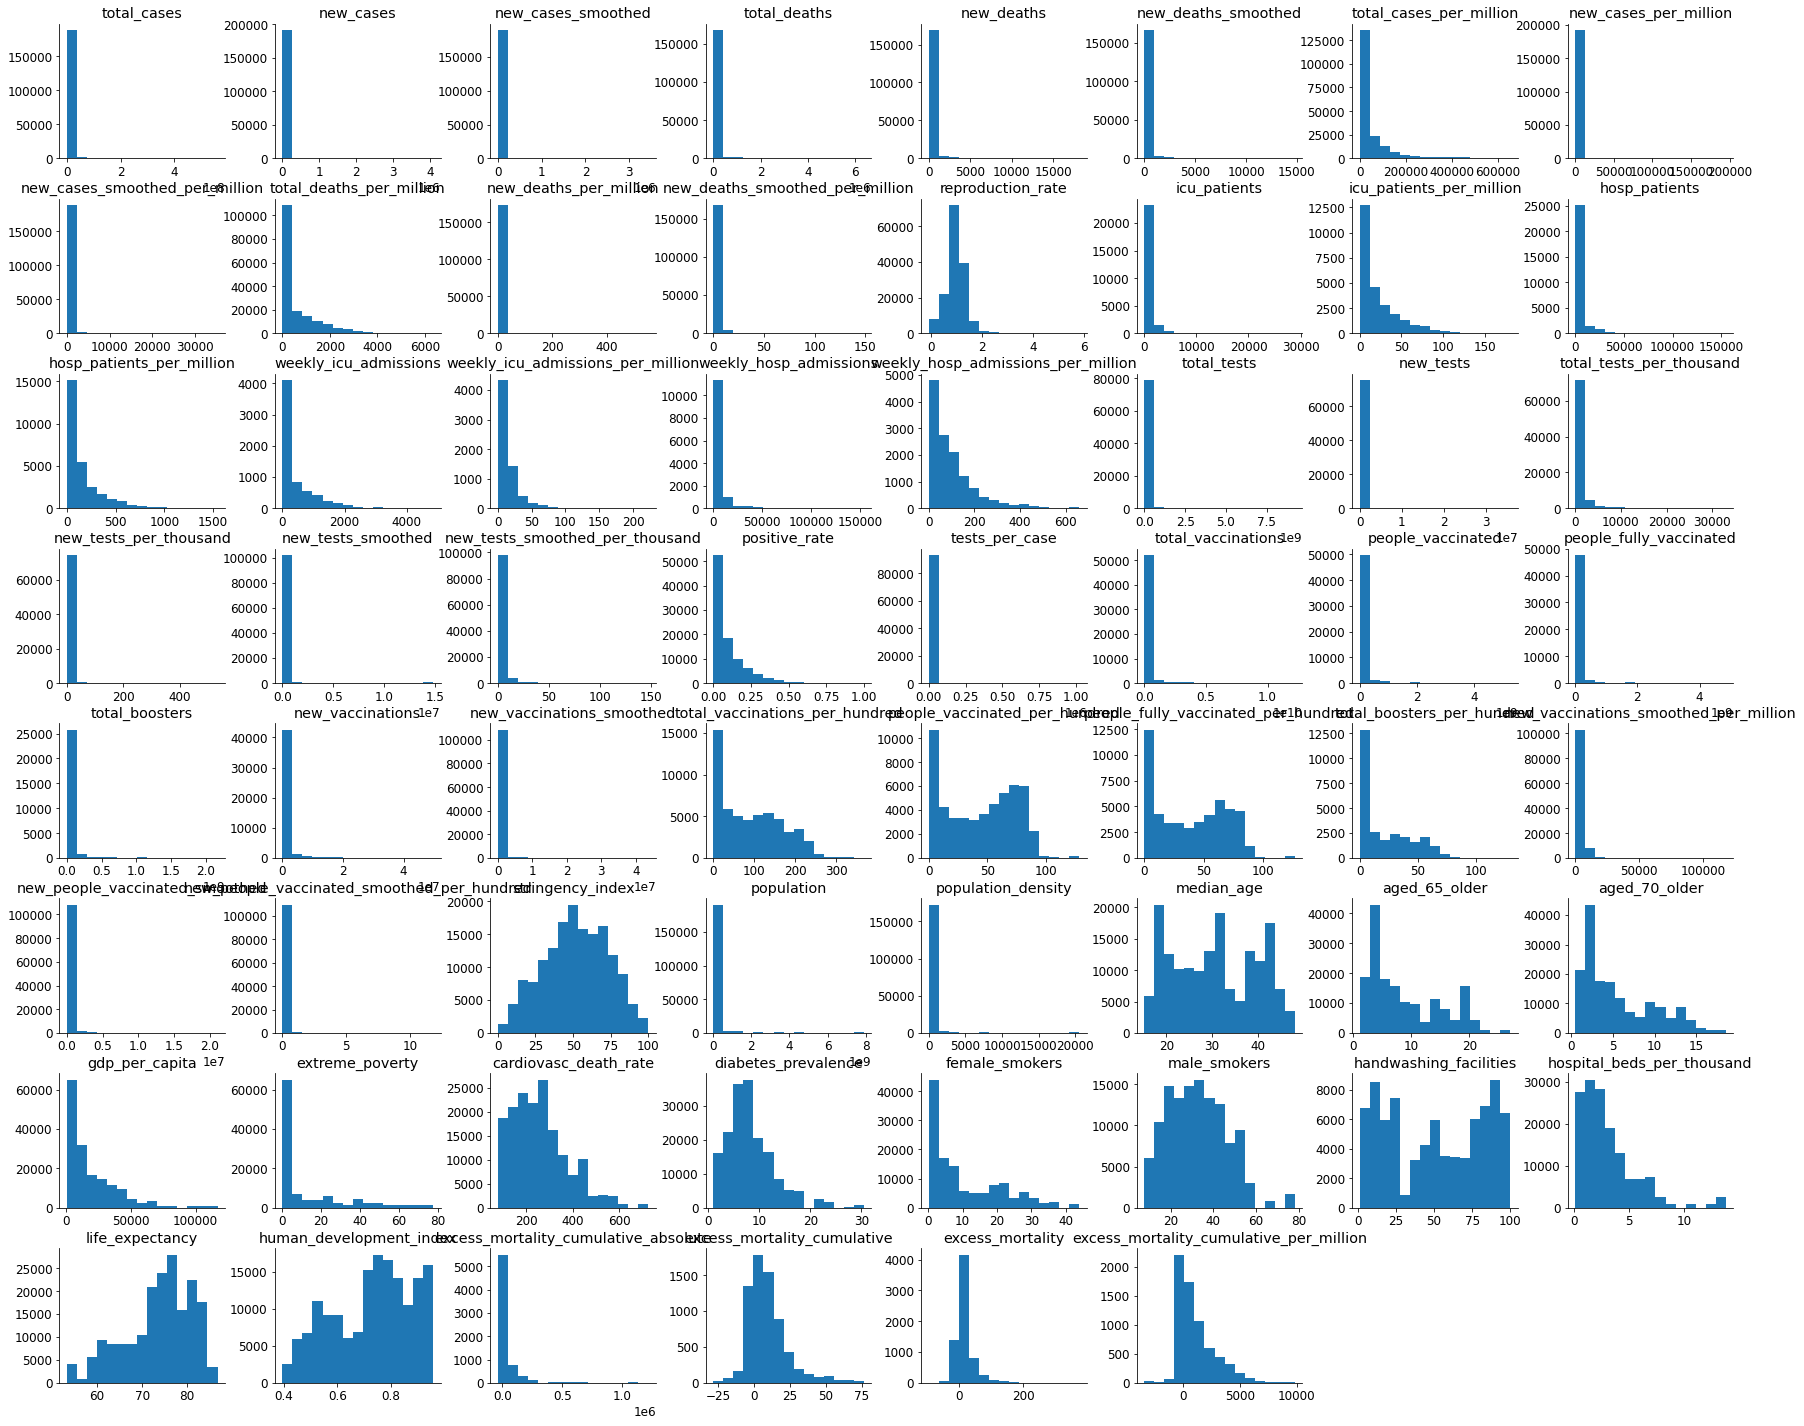

In [7]:
df.hist(figsize=(30,25), bins=15, grid=False);
sns.set()

#Preparação dos dados

Aqui vamos selecionar os atributos que são relevantes para nossa análise e fazer um tratamento nos dados que os compoem.

In [8]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [9]:
# criar novo dataframe
df_covid = df.loc[:,['iso_code','continent', 'date', 'location', 'total_cases', 'new_cases','total_deaths', 'new_deaths', 'icu_patients', 'hosp_patients', 
                     'total_tests', 'new_tests', 'positive_rate', 'tests_per_case', 'total_vaccinations','people_vaccinated',
                     'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'population', 'median_age', 
                     'aged_65_older','aged_70_older', 'female_smokers','male_smokers']].copy()

# visualizar novo dataframe
df_covid.head()

,iso_code,continent,date,location,total_cases,new_cases,total_deaths,new_deaths,icu_patients,hosp_patients,...,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population,median_age,aged_65_older,aged_70_older,female_smokers,male_smokers
0,AFG,Asia,2020-02-24,Afghanistan,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,40099462.0,18.6,2.581,1.337,NaN,NaN
1,AFG,Asia,2020-02-25,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,40099462.0,18.6,2.581,1.337,NaN,NaN
2,AFG,Asia,2020-02-26,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,40099462.0,18.6,2.581,1.337,NaN,NaN
3,AFG,Asia,2020-02-27,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,40099462.0,18.6,2.581,1.337,NaN,NaN
4,AFG,Asia,2020-02-28,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,40099462.0,18.6,2.581,1.337,NaN,NaN


In [10]:
# verificar % dos valores nulos
(((df_covid.isnull().sum().sort_values(ascending=False))/ df_covid.shape[0]) * 100)

icu_patients               87.124758
total_boosters             86.388433
hosp_patients              86.142992
new_vaccinations           77.355791
people_fully_vaccinated    74.887465
people_vaccinated          73.644358
total_vaccinations         72.354052
new_tests                  62.537388
total_tests                60.557957
tests_per_case             53.267750
positive_rate              52.342624
male_smokers               38.585482
female_smokers             37.732399
aged_65_older              18.314702
aged_70_older              17.874000
median_age                 17.441745
new_deaths                 13.289611
total_deaths               13.284146
continent                   5.792716
new_cases                   4.127292
total_cases                 4.007552
population                  0.599195
location                    0.000000
date                        0.000000
iso_code                    0.000000
dtype: float64

Vemos que os atribustos `weekly_icu_admissions`, `icu_patients`, `total_boosters` e `hosp_patients` possuem mais de 80% de dados ausentes, portanto, vou optar por excluir estes atributos.

In [11]:
# excluir atributos
df_covid.drop(['icu_patients', 'total_boosters','hosp_patients'], axis=1, inplace=True)

In [12]:
# excluir location incoerrentes
df_covid.drop(df_covid.index[df_covid.iso_code.str.contains("OWID")].values, inplace = True)

# exluir atributo iso_code
df_covid.drop(['iso_code'], axis=1, inplace=True)

In [13]:
# definir atributo date como index
df_covid.index = df_covid.date

# transformar em datetime
df_covid.index = pd.to_datetime(df_covid.index)

# excluir atributo date 
df_covid.drop(['date'], axis=1, inplace=True)

Os demais eu vou manter pelos seguites motivos:
* Países diferentes começarama a relatar os primeiros casos, mortes, vacinação e etc. em momentos diferentes
* Nem todos os países documentaram os dados nas respectivas datas corretamente
* Para não comprometer nossa análise sobre os países neste períod

In [14]:
# Transformar os termos South America e North American em American
df_covid.replace(['North America', 'South America'], value="America", inplace=True) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


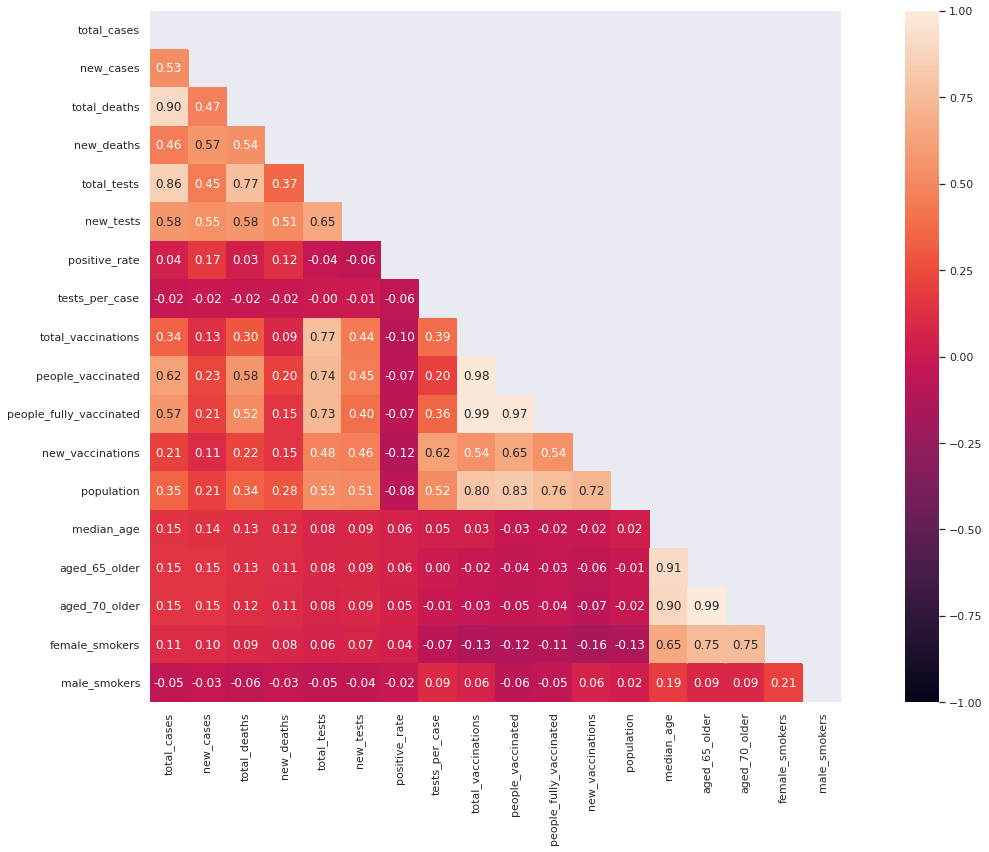

In [15]:
# correlação entre os atributos
corr = df_covid.corr()
mask=np.triu(np.ones_like(corr, dtype=np.bool))

# gráfico heatmap
f, ax = plt.subplots(figsize=(18,12))

# definir parâmetros
sns.set_theme(style='whitegrid')
sns.heatmap(corr, mask= mask, ax=ax, square=True, annot=True, vmin=-1, vmax=1, fmt='.2f');

# plotar
plt.tight_layout()

In [16]:
# relatório de análises com sweetviz
svz = sweetviz.analyze(df_covid)
svz.show_html('Relatório.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Relatório.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Análise dos dados

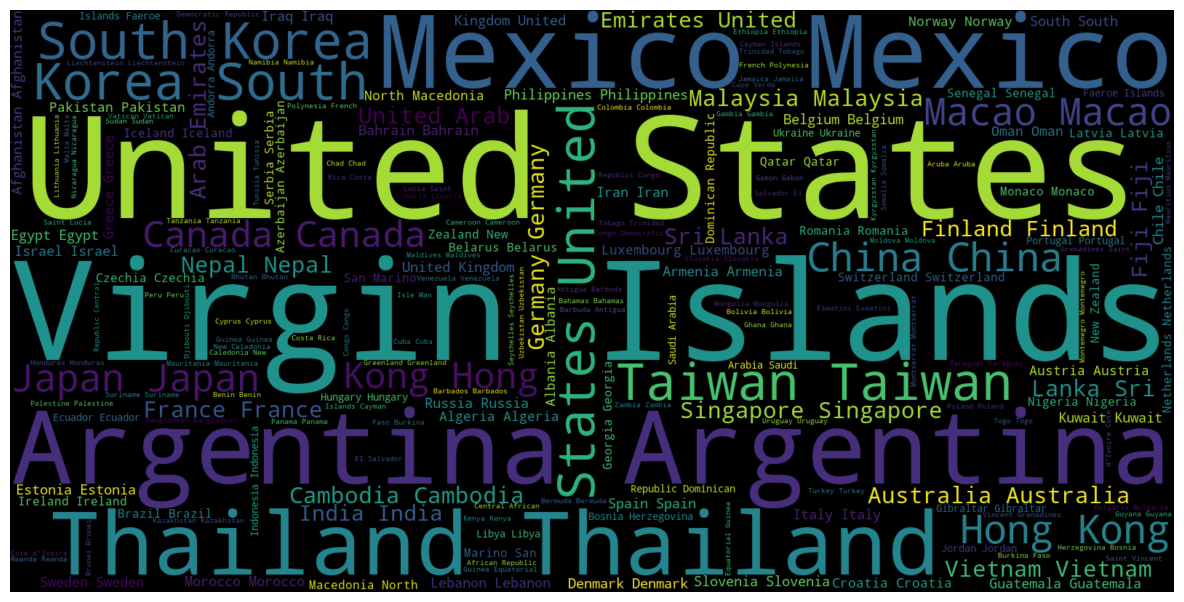

In [17]:
# Gerar uma wordcloud com os países que mais tiveram mortes
paises = df_covid.location.copy()

# definir paráfrafo
paragrafo = " ".join(paises)

# lista de stopwords
stopwords = set(STOPWORDS)
stopwords.update(['Asia','Europe', 'Africa', 'North America', 'South America','Oceania','World', 'Cook Islands','High income','Low income',
                  'Lower middle income', 'North America','Upper middle income', 'middle income', 'middle','income','Lower','High','Low'])

# criar wordcloud
wordcloud = WordCloud(width=1600, height=800, stopwords=stopwords, background_color='black').generate(paragrafo)

#mostrar imagem
f, ax = plt.subplots(figsize=(12,10))

ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.tight_layout()

# salvar imagem
wordcloud.to_file("wordcloudlocation.png",)

**Observar quais continentes que tiveram mais casos de COVID-19**

In [18]:
# observar continentes com mais casos
df_covid.groupby(['continent']).total_cases.sum().sort_values(ascending=False)

continent
America    5.892354e+10
Europe     5.357025e+10
Asia       4.764500e+10
Africa     4.747556e+09
Oceania    1.212154e+09
Name: total_cases, dtype: float64

In [19]:
# observar a % dos casos
porcentagem = (df_covid.groupby(['continent']).total_cases.sum()/df_covid.total_cases.sum() * 100).sort_values(ascending = False).to_dict()
porcentagem

{'Africa': 2.858277315611561,
 'America': 35.47506098784503,
 'Asia': 28.68478513143228,
 'Europe': 32.25209641276925,
 'Oceania': 0.7297801523418721}

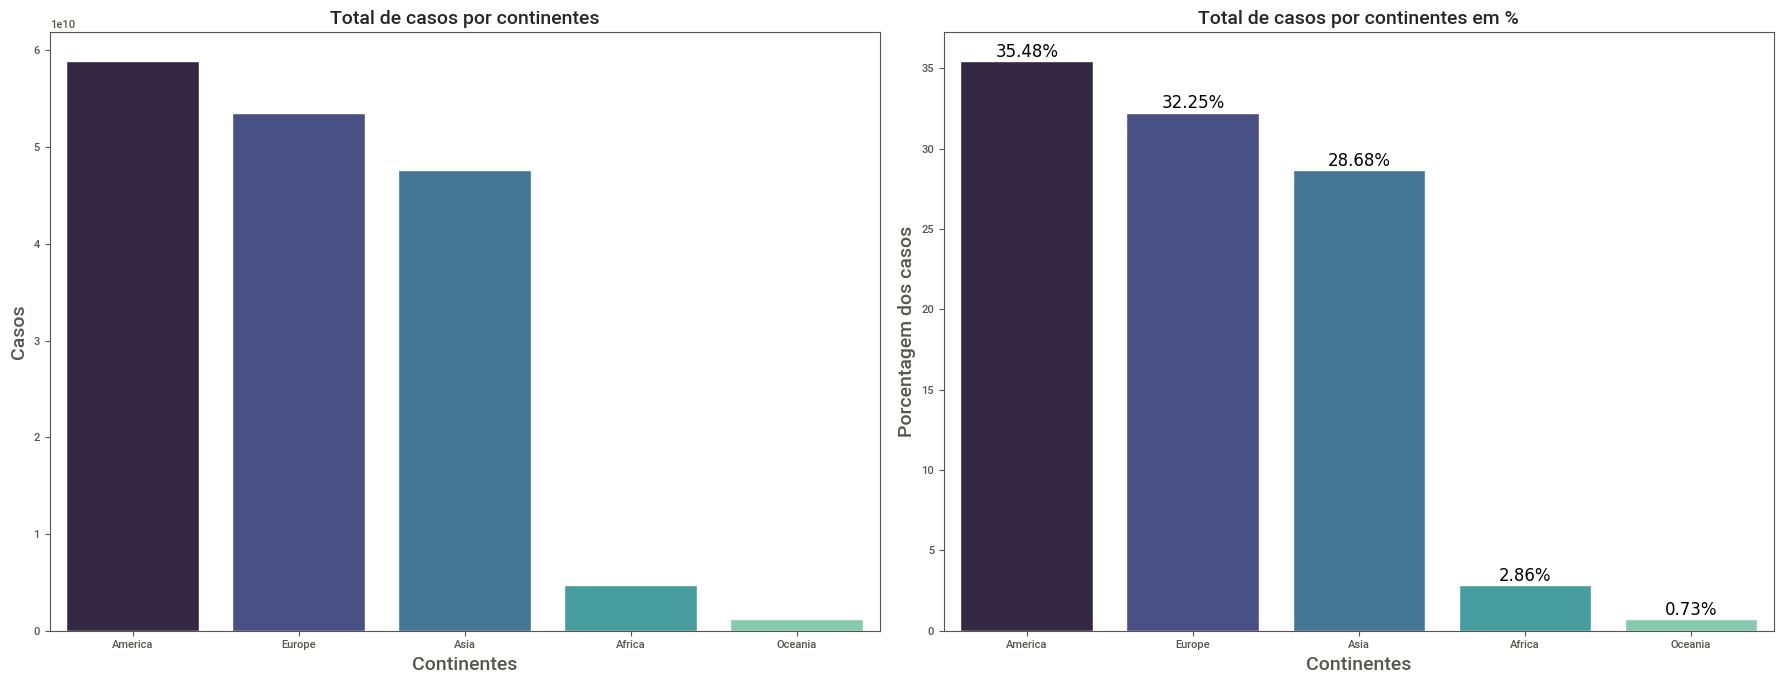

In [20]:
# gráfico para continentes com mais casos
f, ax = plt.subplots(ncols = 2, figsize = (18,7))

# variáveis do gráfico
x = df_covid.groupby(['continent']).total_cases.sum().sort_values(ascending=False).index
y = df_covid.groupby(['continent']).total_cases.sum().sort_values(ascending=False).values

#definir gráfico
rc = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style='white', rc=rc)
ax[0].grid(False)
b = sns.barplot(x=x, y=y, ax=ax[0], palette='mako')
ax[0].set_title("Total de casos por continentes", fontsize=14)
ax[0].set_xlabel("Continentes", fontsize=14)
ax[0].set_ylabel('Casos', fontsize=14)

#definir gráfico de porcentagem
sns.set_theme(style='white', rc=rc)
a = sns.barplot(x=list(porcentagem.keys()), y=list(porcentagem.values()), ax=ax[1], palette='mako', ci=False)
ax[1].grid(False)
ax[1].set_title("Total de casos por continentes em %", fontsize=14)
ax[1].set_xlabel("Continentes", fontsize=14)
ax[1].set_ylabel('Porcentagem dos casos', fontsize=14)

# colocar os valores no topo das barras
for i in a.patches:
  ax[1].annotate('{:0.2f}%'.format(i.get_height()), xy=(i.get_x()+i.get_width()/2, i.get_height()), 
                 ha='center', color='black', xytext=(0,3), textcoords='offset points')

plt.tight_layout()

In [21]:
# ver a média de casos confirmados por semana nos continentes
df_covid.groupby(['continent']).positive_rate.sum().to_frame()

,positive_rate
continent,
Africa,1393.0841
America,2703.9027
Asia,1937.1357
Europe,3171.9833
Oceania,147.6439


In [22]:
# ver a idade média das pessoas que foram afetadas nos continentes
df_covid.groupby(['continent']).median_age.mean().to_frame()

,median_age
continent,
Africa,21.102451
America,32.181513
Asia,30.826946
Europe,42.082705
Oceania,28.681696


**Total de mortes por COVID-19 nos continentes**

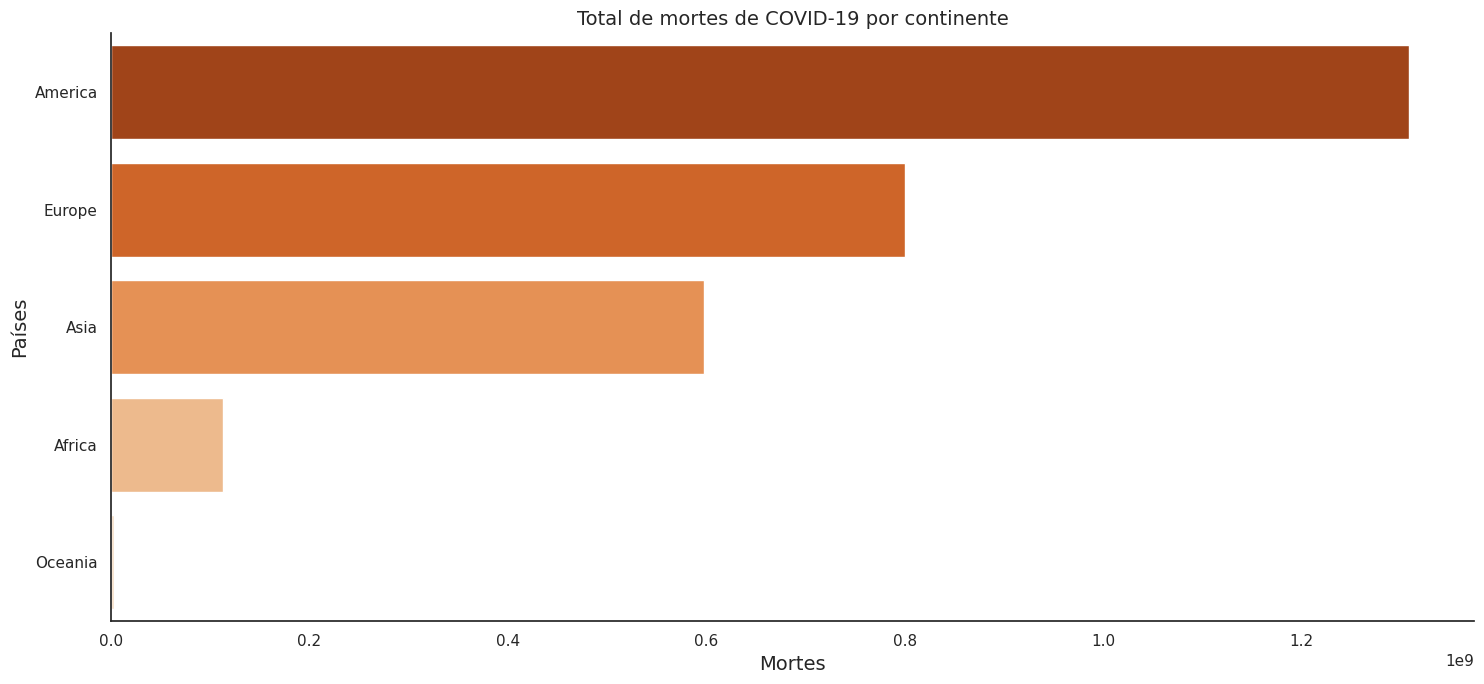

In [23]:
# ver total de mortes por COVID-19 nos continente
fig, ax = plt.subplots(figsize=(15,7))

tdc = df_covid.groupby(['continent']).total_deaths.sum().sort_values(ascending=False)[:10].to_dict()

vg = sns.barplot(x=list(tdc.values()), y=list(tdc.keys()), ax=ax, orient='h', palette='Oranges_r')
ax.set_title('Total de mortes de COVID-19 por continente', fontsize=14)
ax.set_xlabel('Mortes', fontsize=14)
ax.set_ylabel('Países', fontsize=14)

plt.tight_layout()

**Continentes com mais pessoas vacinadas contra a COVID-19**

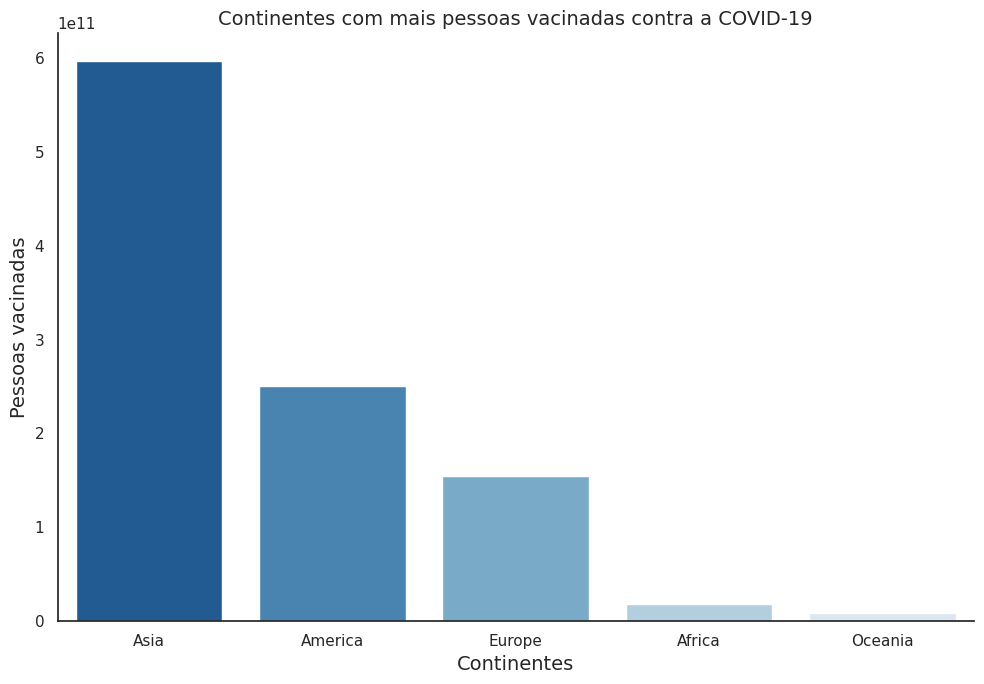

In [24]:
# gráfico dos continentes com as pessoas vacinadas contra o COVID-19
fig, ax = plt.subplots(figsize=(10,7))

# dados
cpv = df_covid.groupby(['continent']).people_vaccinated.sum().sort_values(ascending=False)[:10].to_dict()

# criar gráfico
gcpv = sns.barplot(x=list(cpv.keys()), y=list(cpv.values()), ax=ax, orient='v', palette='Blues_r')
ax.set_title('Continentes com mais pessoas vacinadas contra a COVID-19', fontsize=14)
ax.set_xlabel('Continentes', fontsize=14)
ax.set_ylabel('Pessoas vacinadas', fontsize=14)

plt.tight_layout()

**Média de doses aplicadas da vacina contra a COVID-19 nos continentes**

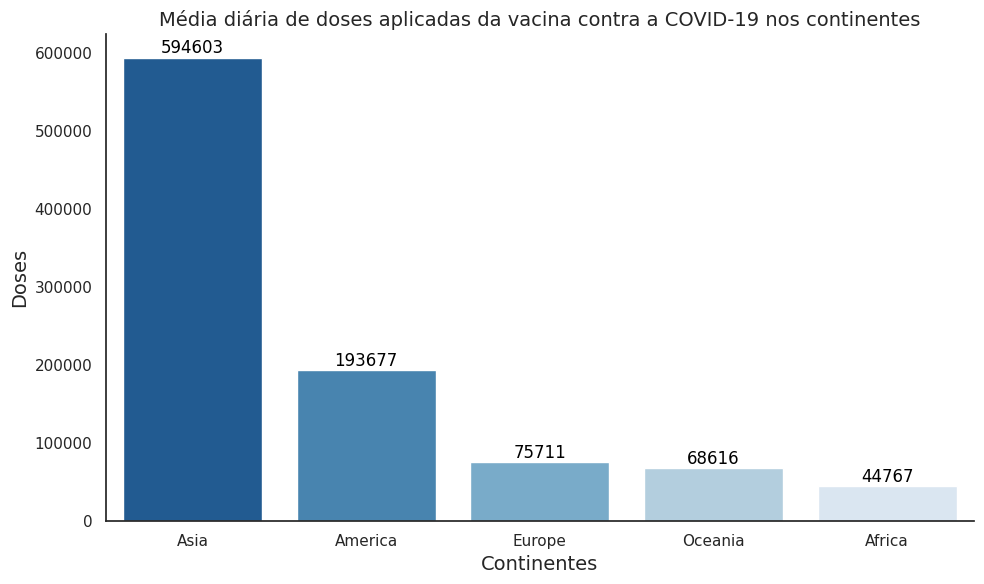

In [25]:
# gráfico para média das vacinas aplicadas diariamente nos continentes
fig, ax = plt.subplots(figsize=(10,6))

# definindo dados
tmc = df_covid.groupby(['continent']).new_vaccinations.mean().sort_values(ascending=False)[:10].to_dict()

# criando gráfico
mmdc = sns.barplot(x=list(tmc.keys()), y=list(tmc.values()), ax=ax, orient='v', palette='Blues_r')
ax.set_title('Média diária de doses aplicadas da vacina contra a COVID-19 nos continentes',fontsize=14)
ax.set_xlabel('Continentes', fontsize=14)
ax.set_ylabel('Doses', fontsize=14)

# colocar os valores no topo das barras
for i in mmdc.patches:
  ax.annotate('{:0.0f}'.format(i.get_height()), xy=(i.get_x()+i.get_width()/2, i.get_height()), 
                 ha='center', color='black', xytext=(0,3), textcoords='offset points')
  
plt.tight_layout()

In [26]:
# quando começou a vacinação no mundo
print('A vacinação no mundo começou em {}'.format(df_covid.loc[df_covid['people_vaccinated'] == df_covid.people_vaccinated.min()].index[0]))

A vacinação no mundo começou em 2021-02-22 00:00:00


**Países com mais casos de COVID-19**

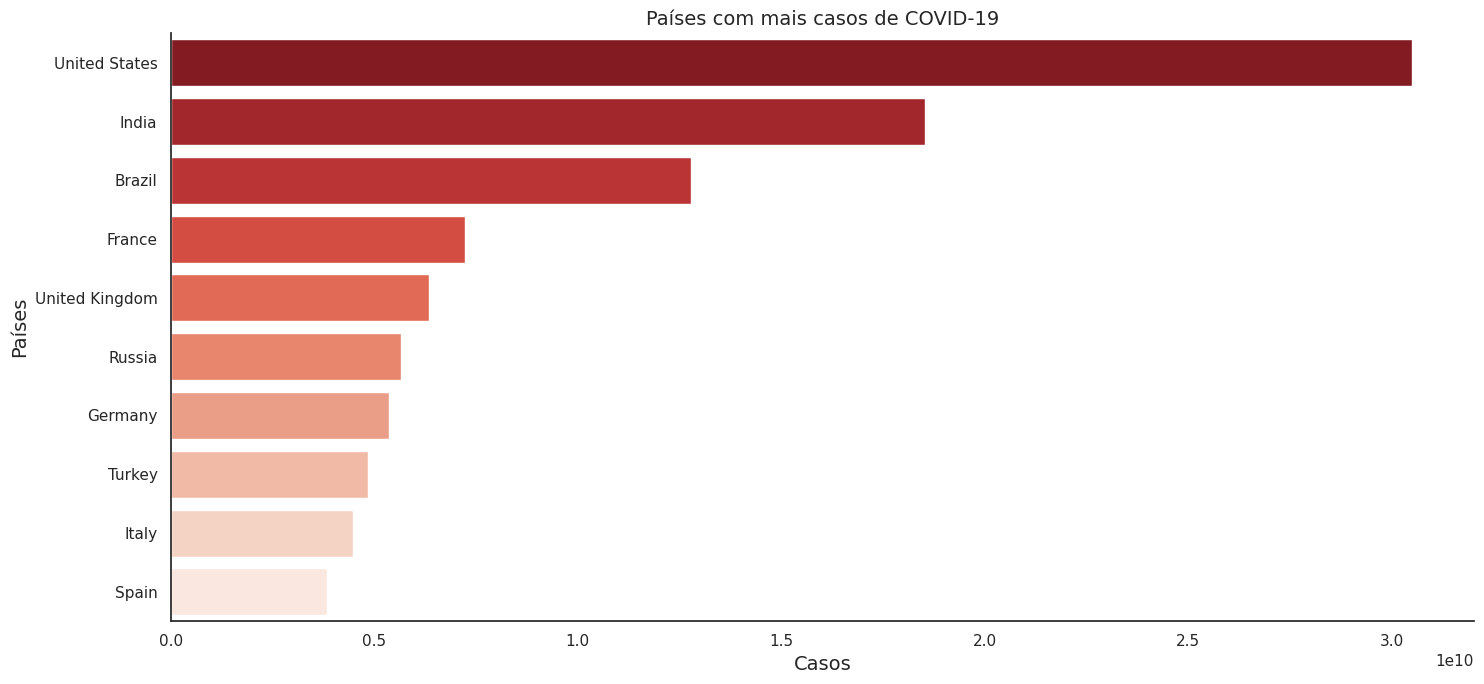

In [27]:
# definir gráfico com os 10 países que tiveram mais casos por COVID-19
fig, ax = plt.subplots(figsize=(15,7))

# definir dados
mc = df_covid.groupby(['location']).total_cases.sum().sort_values(ascending=False)[:10].to_dict()

# criar gráfico
sns.barplot(x=list(mc.values()), y=list(mc.keys()), ax=ax, palette='Reds_r', orient='h')
ax.set_title('Países com mais casos de COVID-19', fontsize=14)
ax.set_ylabel('Países', fontsize=14)
ax.set_xlabel('Casos', fontsize=14)

plt.tight_layout()

In [28]:
# ver qual o maior número de casos em um único dia nos três países que tiveram mais casos
print('Os USA teve {:0.0f} casos em um único dia.'.format(df_covid.loc[df_covid['location'] == 'United States'].new_cases.max()))
print('A Índia teve {:0.0f} casos em um único dia.'.format(df_covid.loc[df_covid['location'] == 'India'].new_cases.max()))
print('O Brasil teve {:0.0f} casos em um único dia.'.format(df_covid.loc[df_covid['location'] == 'Brazil'].new_cases.max()))


Os USA teve 1383889 casos em um único dia.
A Índia teve 414188 casos em um único dia.
O Brasil teve 287149 casos em um único dia.


**Países que tiveram as maiores médias de casos diários por COVID-19**

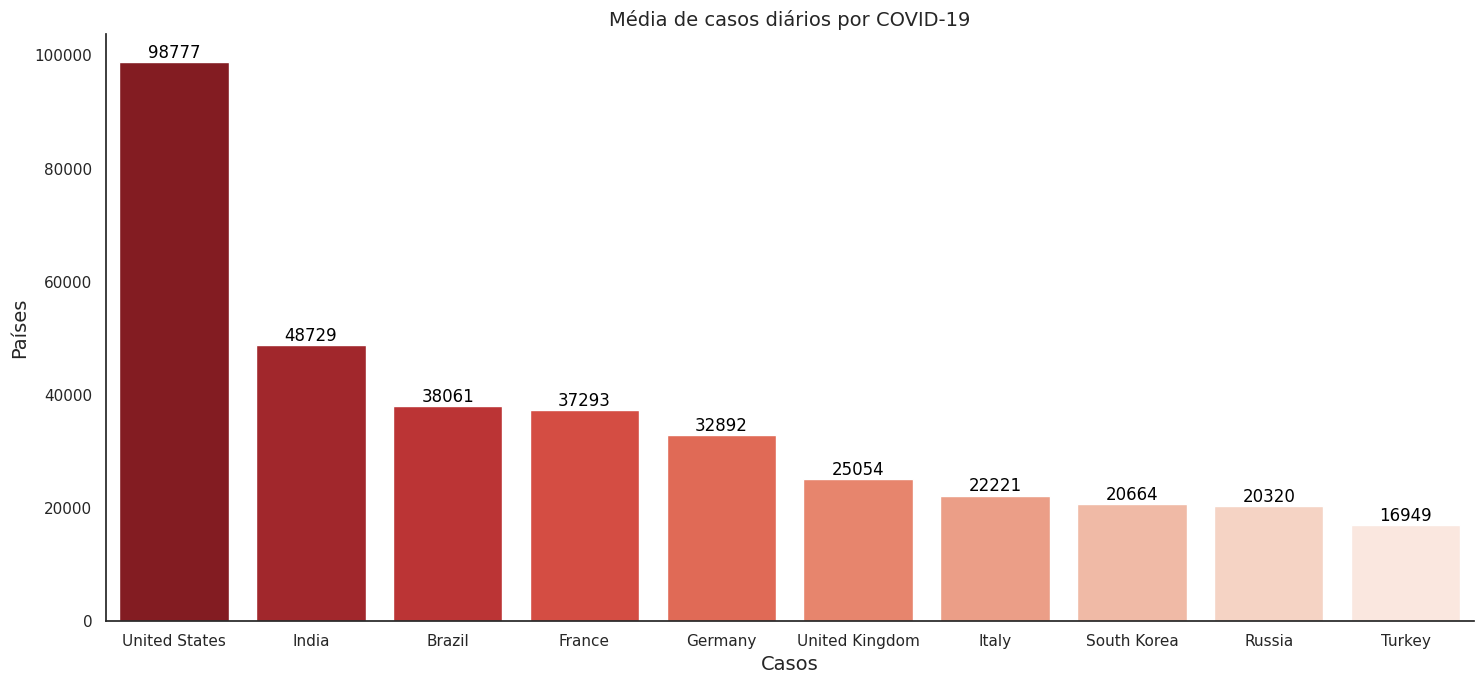

In [29]:
# definir gráfico com os 10 países com maior média de casos diários
fig, ax = plt.subplots(figsize=(15,7))

# definir dados
mcd = df_covid.groupby(['location']).new_cases.mean().sort_values(ascending=False)[:10].to_dict()

# criar gráfico
b = sns.barplot(x=list(mcd.keys()), y=list(mcd.values()), ax=ax, palette='Reds_r', orient='v')
ax.set_title('Média de casos diários por COVID-19', fontsize=14)
ax.set_ylabel('Países', fontsize=14)
ax.set_xlabel('Casos', fontsize=14)

# colocar os valores no topo das barras
for i in b.patches:
  ax.annotate('{:1.00f}'.format(i.get_height()), xy=(i.get_x()+i.get_width()/2, i.get_height()), 
                 ha='center', color='black', xytext=(0,3), textcoords='offset points')
plt.tight_layout()

**Países que tiveram mais mortes por COVID-19**

In [30]:
# ver os 10 países com mais mortes por COCID-19
df_covid.groupby(['location']).total_deaths.sum().sort_values(ascending=False)[:10]

location
United States     457932457.0
Brazil            324182414.0
India             238934862.0
Mexico            162441654.0
Russia            130063878.0
Peru              119077871.0
United Kingdom     91061486.0
Italy              85038631.0
France             75166597.0
Colombia           66932348.0
Name: total_deaths, dtype: float64

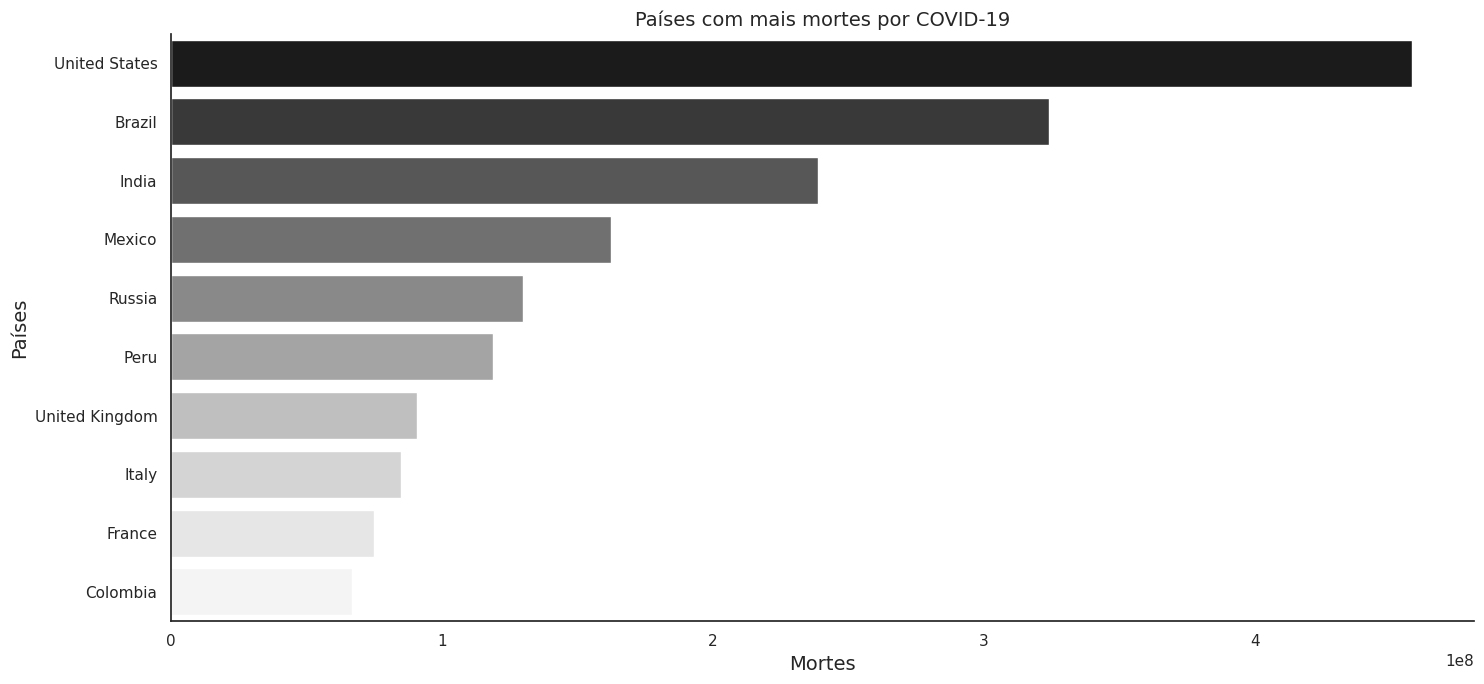

In [31]:
# constuir gráfico com os 10 países que tiveram mais mortes
fig, ax = plt.subplots(figsize=(15,7))

# definir atributos
dados = df_covid.groupby(['location']).total_deaths.sum().sort_values(ascending=False)[:10].to_dict()

# plotar gráfico com total de mortes
sns.set_theme(style='whitegrid', rc=rc)
sns.barplot(x = list(dados.values()), y = list(dados.keys()), ax=ax, orient='h', palette='Greys_r')
ax.grid(False)
ax.set_xlabel('Mortes', fontsize=14)
ax.set_ylabel('Países', fontsize=14)
ax.set_title('Países com mais mortes por COVID-19', fontsize=14)

plt.tight_layout()

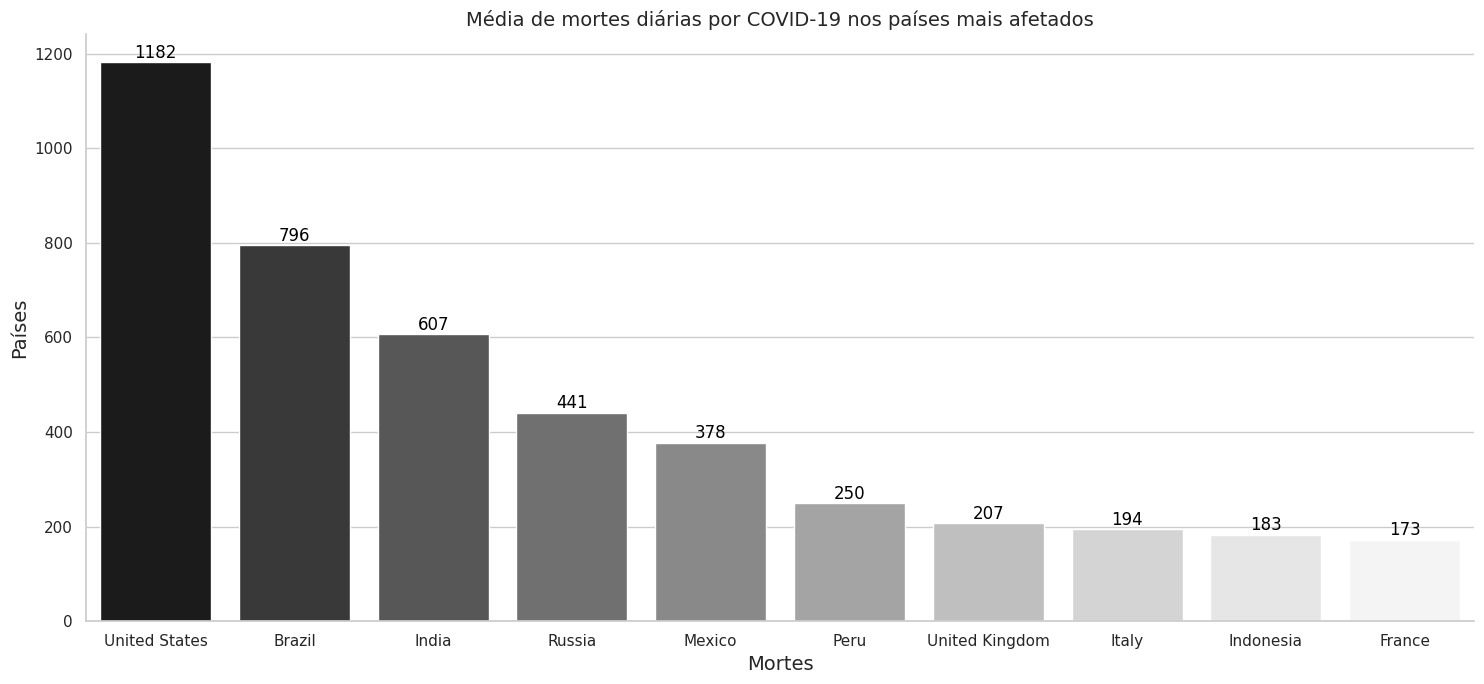

In [32]:
# construir gráfico com a média de mortes diárias 
fig, ax = plt.subplots(figsize=(15,7))

# definindo dados
dados1 = df_covid.groupby(['location']).new_deaths.mean().sort_values(ascending=False)[:10].to_dict()

# plotar gráfico com a média de mortes por dia
sns.set_theme(style='white', rc=rc)
c = sns.barplot(x = list(dados1.keys()), y = list(dados1.values()), ax=ax, orient='v', palette='Greys_r')
ax.set_xlabel('Mortes', fontsize=14)
ax.set_ylabel('Países', fontsize=14)
ax.set_title('Média de mortes diárias por COVID-19 nos países mais afetados', fontsize=14)

# colocar valores no topo das barras
for i in c.patches:
  ax.annotate('{:1.00f}'.format(i.get_height()), xy=(i.get_x()+i.get_width()/2, i.get_height()), 
                 ha='center', color='black', xytext=(0,3), textcoords='offset points')
  
plt.tight_layout()

In [33]:
# sincronizar datas
datas = df_covid.iloc[2:].copy()

eua = datas.loc[datas['location'] == 'United States']
bra = datas.loc[datas['location'] == 'Brazil']
india = datas.loc[datas['location'] == 'India']

**Ver quais países mais vacinaram sua população com todas as doses**

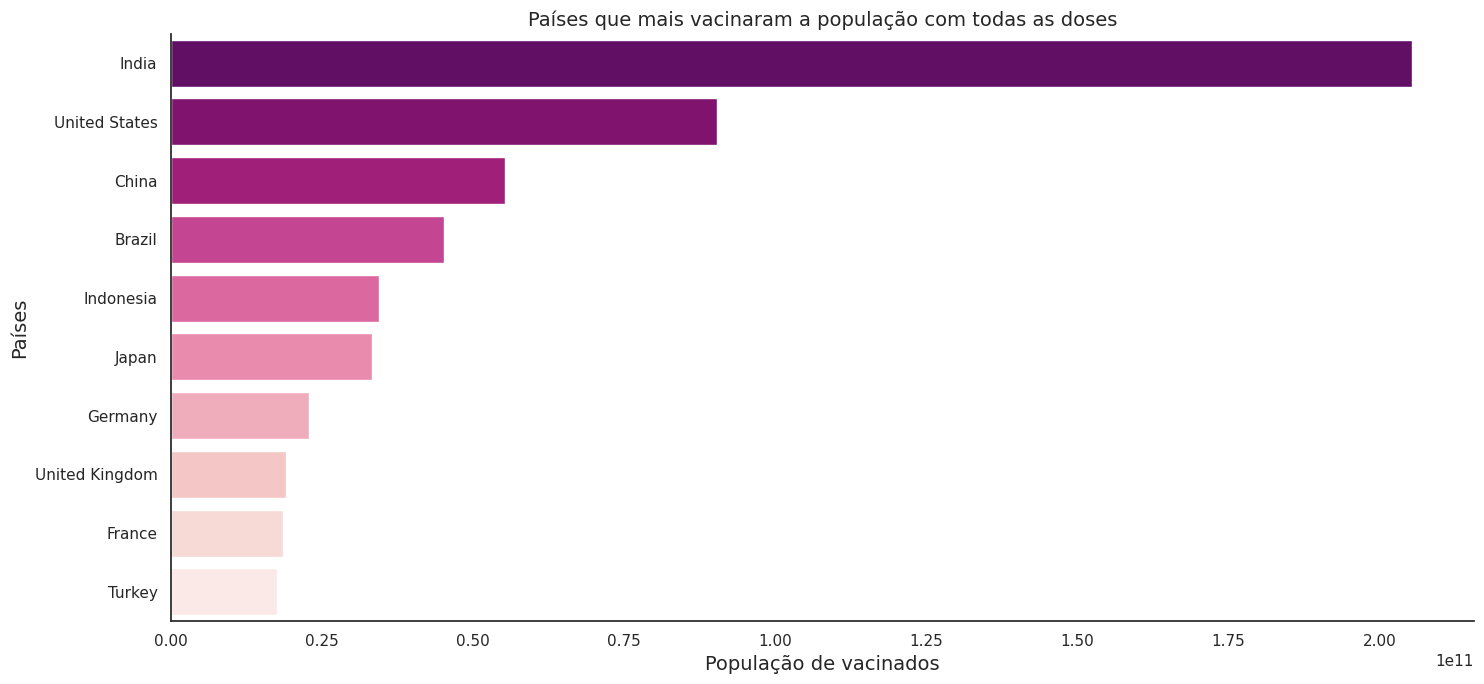

In [34]:
# ver os países que mais vacionou a população com todas as doses
fig, ax = plt.subplots(figsize=(15, 7))

pvp = df_covid.groupby(['location']).people_fully_vaccinated.sum().sort_values(ascending=False)[:10].to_dict()

sns.barplot(x=list(pvp.values()), y=list(pvp.keys()), ax=ax, orient='h', palette='RdPu_r')
ax.set_title('Países que mais vacinaram a população com todas as doses', fontsize=14)
ax.set_xlabel('População de vacinados', fontsize=14)
ax.set_ylabel('Países', fontsize=14)

plt.tight_layout()

In [35]:
# ver média de vacinas da COVID-19 aplicadas no dia pelo mundo
print('A média de vacinas contra a COVID-19 aplicadas diariamente foram {:0.0f} doses.'.format(df_covid.new_vaccinations.mean()))

A média de vacinas contra a COVID-19 aplicadas diariamente foram 261694 doses.


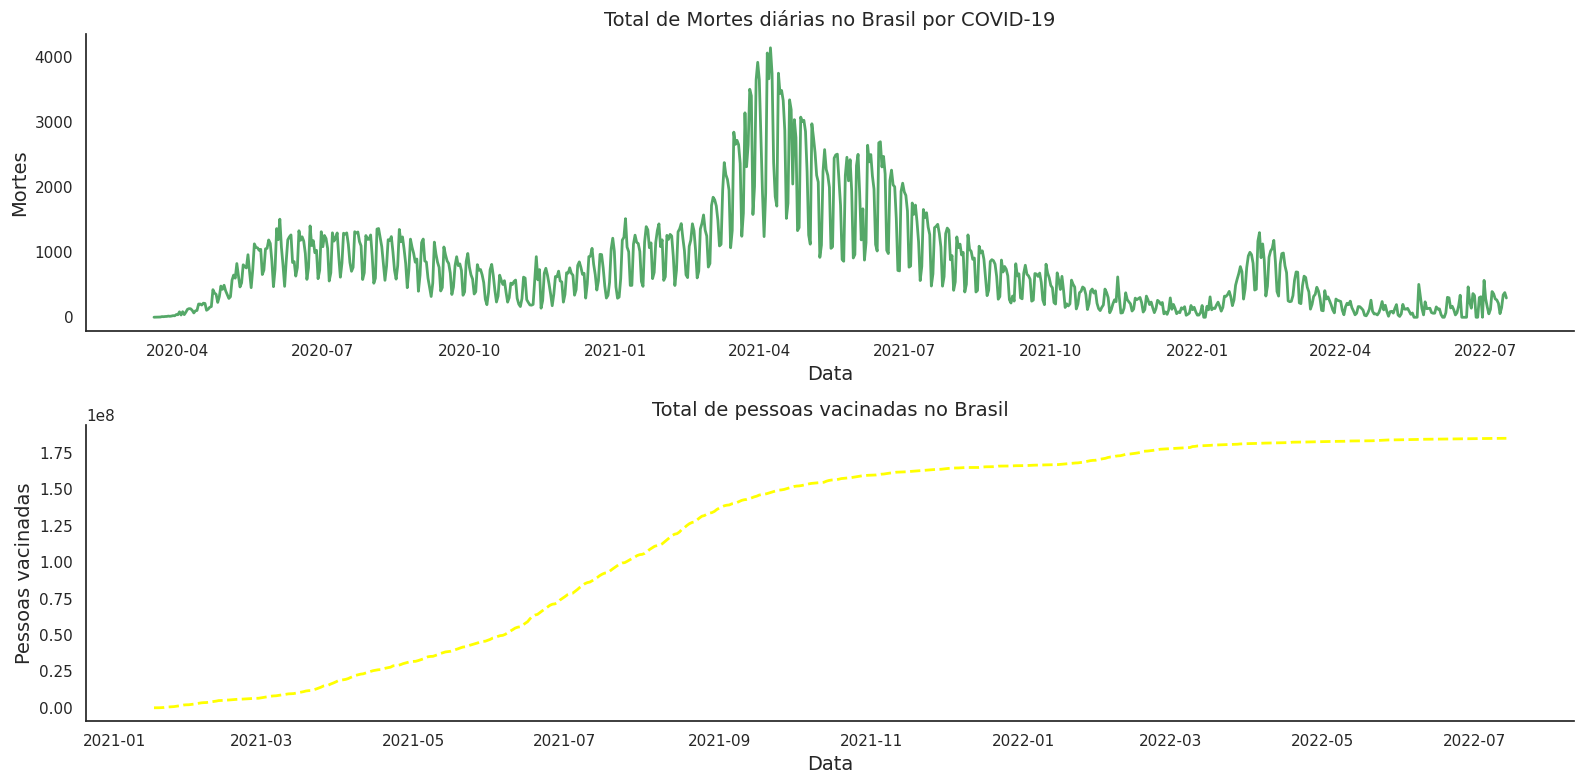

In [36]:
# gráfico comparando as mortes diárias com as vacinas no Brasil
fig, ax = plt.subplots(nrows=2, figsize=(16, 8))

sns.lineplot(x=bra.index, y=bra.new_deaths, linewidth=2.0, color='g', ax=ax[0])
ax[0].set_title('Total de Mortes diárias no Brasil por COVID-19', fontsize=14)
ax[0].set_ylabel('Mortes', fontsize=14)
ax[0].set_xlabel('Data', fontsize=14)

sns.lineplot(x=bra.index, y=bra.people_vaccinated, linewidth=2.0, linestyle='--', color='yellow', ax=ax[1])
ax[1].set_title('Total de pessoas vacinadas no Brasil', fontsize=14)
ax[1].set_ylabel('Pessoas vacinadas', fontsize=14)
ax[1].set_xlabel('Data', fontsize=14)

plt.tight_layout()

In [37]:
# ver quando o Brasil começou a vacinar sua população
print('Em {} começou a vacinação contra a COVID-19 no Brasil.\n'.format(bra.loc[bra['total_vaccinations'] == bra.total_vaccinations.min()].index[0]))

# ver quando 1/3 da população brasileira estava vacinada
print('Em {} 1/3 da população estava vacinado no Brasil.\n'.format(bra.loc[bra['people_vaccinated'] >= bra.population / 3].index[0]))

# comparar média diária de mortes antes e depois de 1/3 estar vacinado
print('Antes: {:0.0f} mortes diárias por COVID-19.'.format(bra[:'2021-06-28'].new_deaths.mean()))
print('Depois: {:0.0f} mortes diárias por COVID-19.\n'.format(bra['2021-06-28':].new_deaths.mean()))

# ver pico de mortes em um dia
print('{:0.0f} foi o pico de mortes diárias por COVID-19 no Brasil.'.format(bra.new_deaths.max()))

Em 2021-01-17 00:00:00 começou a vacinação contra a COVID-19 no Brasil.

Em 2021-06-28 00:00:00 1/3 da população estava vacinado no Brasil.

Antes: 1097 mortes diárias por COVID-19.
Depois: 424 mortes diárias por COVID-19.

4148 foi o pico de mortes diárias por COVID-19 no Brasil.


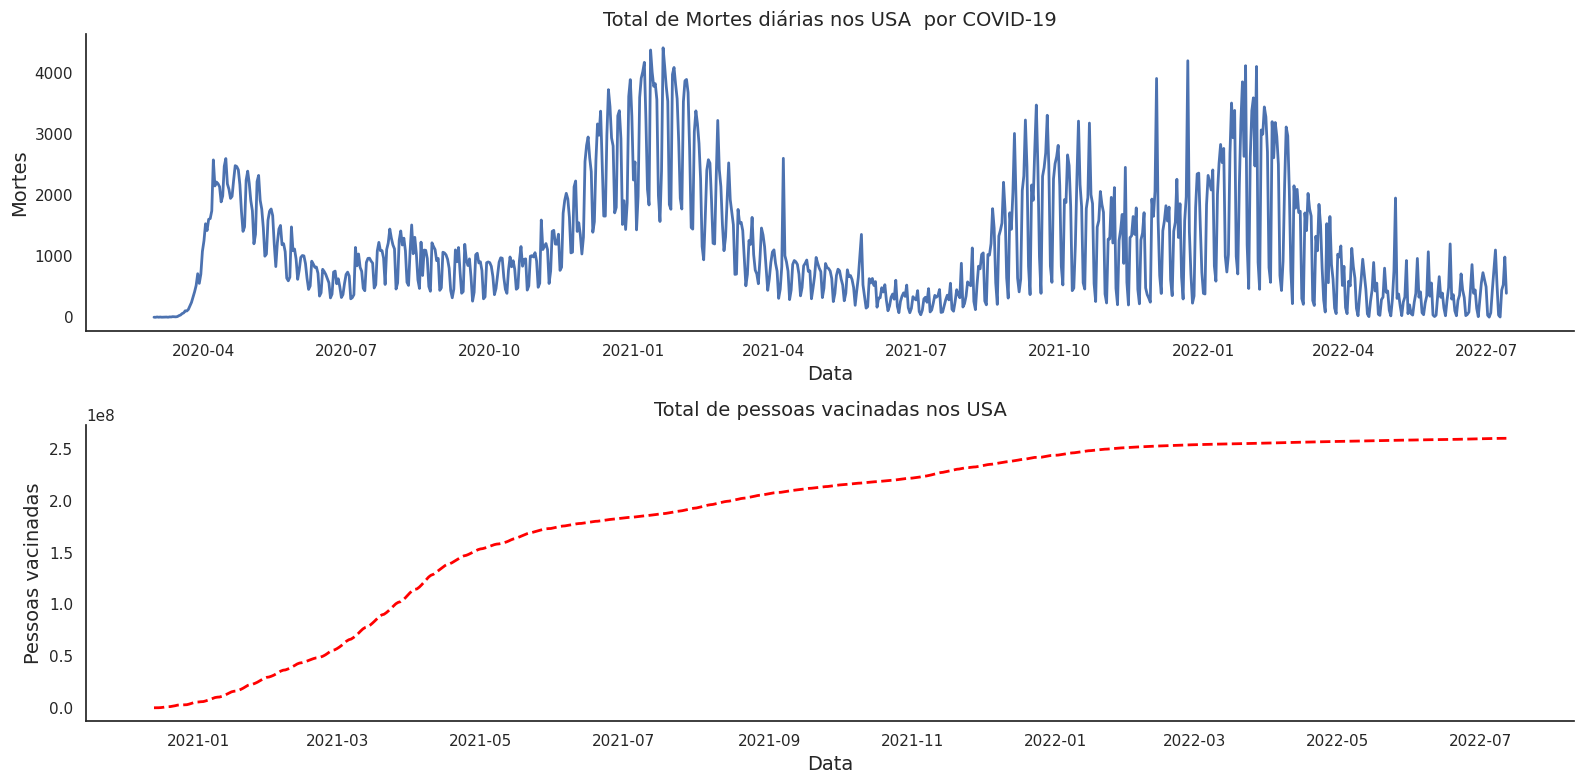

In [38]:
# gráfico comparando as mortes diárias com as vacinas nos USA
fig, ax = plt.subplots(nrows=2, figsize=(16, 8))

sns.lineplot(x=eua.index, y=eua.new_deaths, linewidth=2.0, color='b', ax=ax[0])
ax[0].set_title('Total de Mortes diárias nos USA  por COVID-19', fontsize=14)
ax[0].set_ylabel('Mortes', fontsize=14)
ax[0].set_xlabel('Data', fontsize=14)

sns.lineplot(x=eua.index, y=eua.people_vaccinated, linewidth=2.0, linestyle='--', color='red', ax=ax[1])
ax[1].set_title('Total de pessoas vacinadas nos USA', fontsize=14)
ax[1].set_ylabel('Pessoas vacinadas', fontsize=14)
ax[1].set_xlabel('Data', fontsize=14)

plt.tight_layout()

In [39]:
# ver quando os USA começou a vacinar sua população
print('Em {} começou a vacinação contra a COVID-19 nos USA.\n'.format(eua.loc[eua['total_vaccinations'] == eua.total_vaccinations.min()].index[0]))

# ver quando 1/3 da população americana estava vacinada
print('Em {} 1/3 da população estava vacinada nos USA.\n'.format(eua.loc[eua['people_vaccinated'] >= eua.population / 3].index[0]))

# comparar média diária de mortes antes e depois de 1/3 estar vacinado
print('Antes: {:0.0f} mortes diárias por COVID-19.'.format(eua[:'2021-04-02'].new_deaths.mean()))
print('Depois: {:0.0f} mortes diárias por COVID-19.\n'.format(eua['2021-04-02':].new_deaths.mean()))

# ver pico de mortes em um dia
print('{:0.0f} foi o pico de mortes diárias por COVID-19 nos USA.'.format(eua.new_deaths.max()))

Em 2020-12-13 00:00:00 começou a vacinação contra a COVID-19 nos USA.

Em 2021-04-02 00:00:00 1/3 da população estava vacinada nos USA.

Antes: 1379 mortes diárias por COVID-19.
Depois: 1013 mortes diárias por COVID-19.

4411 foi o pico de mortes diárias por COVID-19 nos USA.


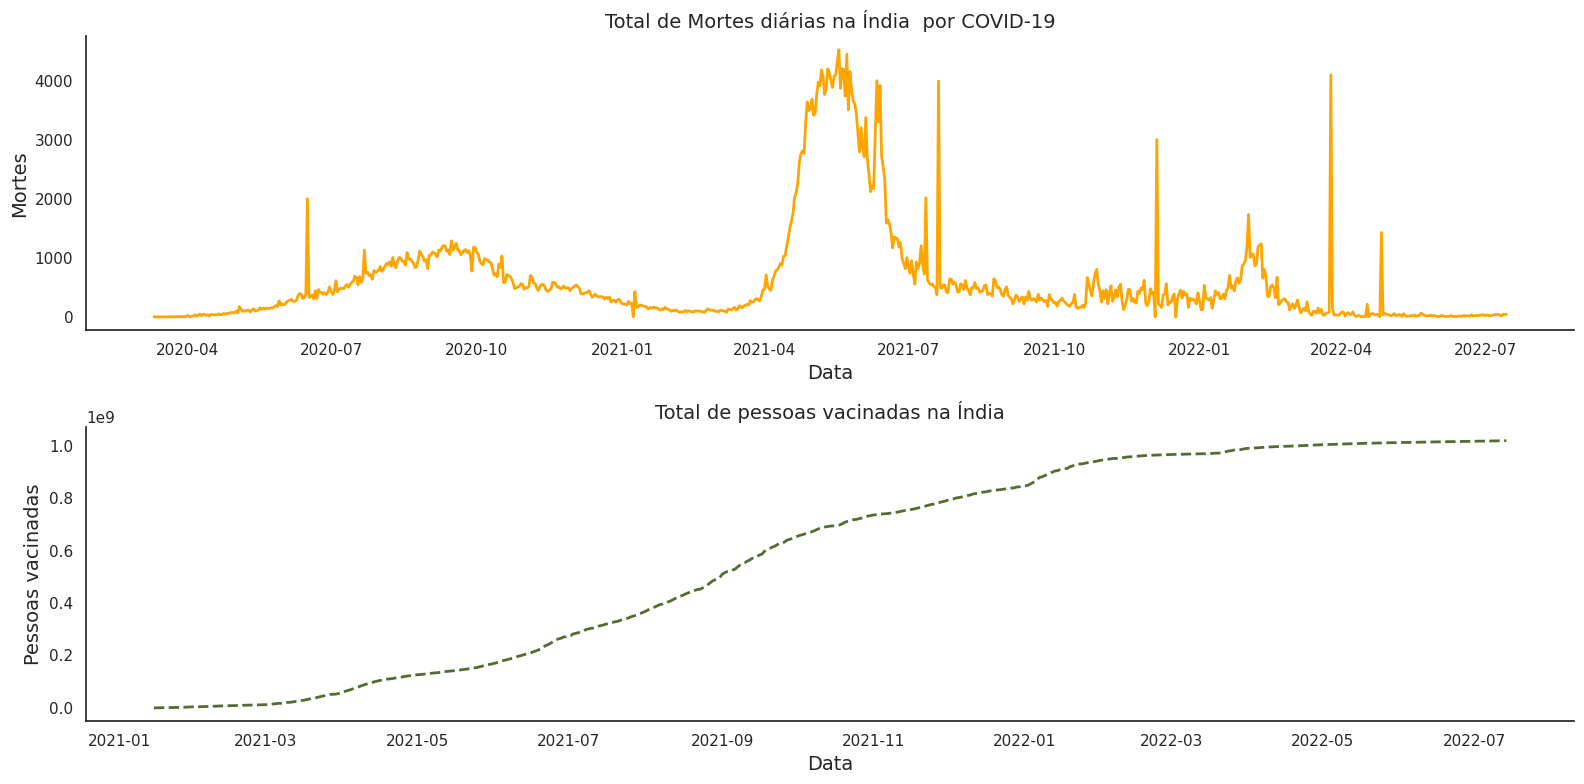

In [40]:
# gráfico comparando as mortes diárias com as vacinas na Índia
fig, ax = plt.subplots(nrows=2, figsize=(16, 8))

sns.lineplot(x=india.index, y=india.new_deaths, linewidth=2.0, color='orange', ax=ax[0])
ax[0].set_title('Total de Mortes diárias na Índia  por COVID-19', fontsize=14)
ax[0].set_ylabel('Mortes', fontsize=14)
ax[0].set_xlabel('Data', fontsize=14)

sns.lineplot(x=india.index, y=india.people_vaccinated, linewidth=2.0, linestyle='--', color='darkolivegreen', ax=ax[1])
ax[1].set_title('Total de pessoas vacinadas na Índia', fontsize=14)
ax[1].set_ylabel('Pessoas vacinadas', fontsize=14)
ax[1].set_xlabel('Data', fontsize=14)

plt.tight_layout()

In [41]:
# ver quando a Índia começou a vacinar sua população
print('Em {} começou a vacinação contra a COVID-19 na Índia.\n'.format(india.loc[india['total_vaccinations'] == india.total_vaccinations.min()].index[0]))

# ver quando 1/3 da população indiana estava vacinada
print('Em {} 1/3 da população estava vacinada na Índia.\n'.format(india.loc[india['people_vaccinated'] >= india.population / 3].index[0]))

# comparar média diária de mortes antes e depois de 1/3 estar vacinado
print('Antes: {:0.0f} mortes diárias por COVID-19.'.format(india[:'2021-08-27'].new_deaths.mean()))
print('Depois: {:0.0f} mortes diárias por COVID-19.\n'.format(india['2021-08-27':].new_deaths.mean()))

# ver pico de mortes em um dia
print('{:0.0f} foi o pico de mortes diárias por COVID-19 na Índia.'.format(india.new_deaths.max()))

Em 2021-01-15 00:00:00 começou a vacinação contra a COVID-19 na Índia.

Em 2021-08-27 00:00:00 1/3 da população estava vacinada na Índia.

Antes: 807 mortes diárias por COVID-19.
Depois: 276 mortes diárias por COVID-19.

4529 foi o pico de mortes diárias por COVID-19 na Índia.


#Conclusão

Com nossa análise feita com os dados da COVID-19 fornecidos pela Our World Data podemos tirar alguns inshigts:
*  A América e a Europa foram os continentes com mais casos, representando mais de 1/3 do total de casos cada, com uma média de 2703.9027 e 3171.9833 casos semanais, respectivamente.
* A média de idade das pessoas afetadas pelo vírus na Africa, América, Asia, Europa e Oceânia são 21, 32, 31, 42 e 28 anos, respectivamente.
* América foi o continente com mais mortes pelo vírus.
* A Asia foi o continente que mais vacinou sua população com todas as doses, com uma média de 594603 doses aplicadas diariamente.
* Estados Unidos, Brasil e Índia foram os países com mais mortes por COVID-19, com uma média de 1182, 796 e 607 mortes diárias, respectivamente.
* Os Estados Unidos teve 1383889 casos e 4411 mortes em um único dia.
* A Índia teve 414188 casos e 4529 mortes em um único dia.
* O Brasil teve 287149 casos e 4148 mortes em um único dia.
* Em 15/01/2021 começou a vacinação contra a COVID-19 na Índia com uma média de 807 mortes diárias por COVID-19 e em 03/08/2021 cerca de 1/3 da população estava vacinada, levando a média para 276 mortes diárias por COVID-19.
* Em 17/01/2021 começou a vacinação contra a COVID-19 no Brasil com uma média de 1097 mortes diárias por COVID-19. Em 28/06/2021 cerca 1/3 da população estava vacinado no Brasil, reduzindo a média para 424 mortes diárias por COVID-19.
* Cerca de 261694 doses eram aplicadas diariamente pelo mundo.
* Quanto mais pessoas estivessem vacinadas menor era a taxa de mortalidade causada pelo vírus.

Por fim, lembre-se que esta foi uma análise superficial com objetivos de estudos para se ter uma visão conscituacional sobre a doença que parou o mundo por mais de um ano. Algumas métricas podem ficar diferentes conforme vai atualizando os dados sobre o impacto do vírus em nosso dataset, pois esta análise foi feita no dia 15/07/2022.
